In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

%matplotlib inline



In [2]:
s_major = 1.2
s_minor = 0.7
q = 0.003

In [3]:
x_major, y_major = [], []
x_minor, y_minor = [], []


for theta in (np.linspace(0,2*np.pi, 1000)):
    
    kplus = np.sqrt( ( np.cos(2*theta) + np.sqrt(s_major**4 - np.sin(2*theta)**2) ) / ( s_major**2 - (1./s_major**2) ) )
    kminus = np.sqrt( ( np.cos(2*theta) - np.sqrt(s_major**4 - np.sin(2*theta)**2) ) / ( s_major**2 - (1./s_major**2) ) )
    
    xplus = np.sqrt(q)* ( kplus - (1./kplus) + (kplus/s_major**2) )* np.cos(theta)
    yplus = np.sqrt(q)* ( kplus - (1./kplus) - (kplus/s_major**2) )* np.sin(theta)
    
    x_major.append(xplus)
    y_major.append(yplus)
    
    xminus = np.sqrt(q)* ( kminus - (1./kminus) + (kminus/s_major**2) )* np.cos(theta)
    yminus = np.sqrt(q)* ( kminus - (1./kminus) - (kminus/s_major**2) )* np.sin(theta)
    
    x_major.append(xminus)
    y_major.append(yminus)
    
    kplus = np.sqrt( ( np.cos(2*theta) + np.sqrt(s_minor**4 - np.sin(2*theta)**2) ) / ( s_minor**2 - (1./s_minor**2) ) )
    kminus = np.sqrt( ( np.cos(2*theta) - np.sqrt(s_minor**4 - np.sin(2*theta)**2) ) / ( s_minor**2 - (1./s_minor**2) ) )
    
    xplus = np.sqrt(q)* ( kplus - (1./kplus) + (kplus/s_minor**2) )* np.cos(theta)
    yplus = np.sqrt(q)* ( kplus - (1./kplus) - (kplus/s_minor**2) )* np.sin(theta)
    
    x_minor.append(xplus)
    y_minor.append(yplus)
    
    xminus = np.sqrt(q)* ( kminus - (1./kminus) + (kminus/s_minor**2) )* np.cos(theta)
    yminus = np.sqrt(q)* ( kminus - (1./kminus) - (kminus/s_minor**2) )* np.sin(theta)
    
    x_minor.append(xminus)
    y_minor.append(yminus)


/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in sqrt
/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in sqrt
/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt


In [4]:
def range_brace(x_min, x_max, mid=0.75, 
                beta1=50.0, beta2=100.0, height=1, 
                initial_divisions=11, resolution_factor=1.5):
    # determine x0 adaptively values using second derivitive
    # could be replaced with less snazzy:
    #   x0 = NP.arange(0, 0.5, .001)
    x0 = np.array(())
    tmpx = np.linspace(0, 0.5, initial_divisions)
    tmp = beta1**2 * (np.exp(beta1*tmpx)) * (1-np.exp(beta1*tmpx)) / np.power((1+np.exp(beta1*tmpx)),3)
    tmp += beta2**2 * (np.exp(beta2*(tmpx-0.5))) * (1-np.exp(beta2*(tmpx-0.5))) / np.power((1+np.exp(beta2*(tmpx-0.5))),3)
    for i in range(0, len(tmpx)-1):
        t = int(np.ceil(resolution_factor*max(np.abs(tmp[i:i+2]))/float(initial_divisions)))
        x0 = np.append(x0, np.linspace(tmpx[i],tmpx[i+1],t))
    x0 = np.sort(np.unique(x0)) # sort and remove dups
    # half brace using sum of two logistic functions
    y0 = mid*2*((1/(1.+np.exp(-1*beta1*x0)))-0.5)
    y0 += (1-mid)*2*(1/(1.+np.exp(-1*beta2*(x0-0.5))))
    # concat and scale x
    x = np.concatenate((x0, 1-x0[::-1])) * float((x_max-x_min)) + x_min
    y = np.concatenate((y0, y0[::-1])) * float(height)
    return (x,y)

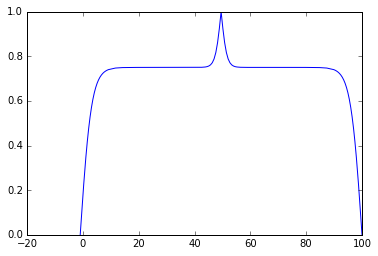

In [5]:
x,y = range_brace(-1, 100)
plt.plot(x, y,'-')

/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:44: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


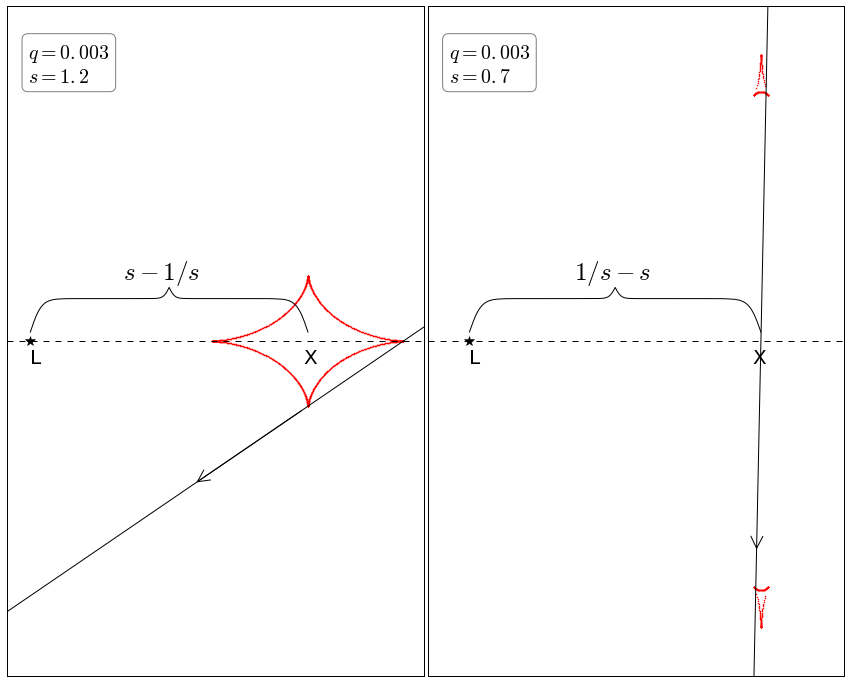

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12), sharey=True)
axs[0].plot(np.asarray(x_major)*3, 0.5 * np.asarray(y_major), 'r.', markersize = 2)
axs[1].plot(x_minor, y_minor, 'r.', markersize = 2)


axs[0].axhline(0, color = 'k', linestyle = '--')
axs[1].axhline(0, color = 'k', linestyle = '--')


axs[0].plot(-1 * s_major, 0.0 , '*', color = 'k', markersize = 10)
axs[1].plot(-1 * s_minor, 0.0 , '*', color = 'k', markersize = 10)

axs[0].tick_params(axis='both',which='both', bottom='off', top='off',left = 'off', right = 'off', labelbottom='off', labelleft='off')
axs[1].tick_params(axis='both',which='both', bottom='off', top='off',left = 'off', right = 'off', labelbottom='off', labelleft='off')

plt.subplots_adjust(left=None, bottom=None,  right=None, top=None, wspace=0.01, hspace=None)

# For the major image
# Define the known points
x = [6*(np.sqrt(q))/ (s_major*np.sqrt(s_major**2 - 1)),  0]
y = [0, -2*(np.sqrt(q))/ (s_major*np.sqrt(s_major**2 + 1))/2]

# Calculate the coefficients. This line answers the initial question. 
coefficients = np.polyfit(x, y, 1)

# Let's compute the values of the line...
polynomial = np.poly1d(coefficients)
x_axis = np.linspace(-1 * s_major - 0.1,0.5,100)
y_axis = polynomial(x_axis)

axs[0].plot(x_axis, y_axis, 'k')

con = ConnectionPatch((-0.01, polynomial(-0.01)), (-0.5, polynomial(-0.5)), 'data', 'data',
                      arrowstyle="->", shrinkA=5, shrinkB=5,color='k',
                      mutation_scale=30, fc="w")
axs[0].add_artist(con)

#################################
# For the Minor image
# Define the known points
points = [((3*np.sqrt(3*q)*(s_minor**3))/8,  1.4*np.sqrt(q)/s_minor), (-(3*np.sqrt(3*q)*(s_minor**3))/8,  -1.4*np.sqrt(q)/s_minor)]
x_coords, y_coords = zip(*points)
A = np.vstack([x_coords,np.ones(len(x_coords))]).T
m, c = np.linalg.lstsq(A, y_coords)[0]
# print("Line Solution is y = {m}x + {c}".format(m=m,c=c))

# Let's compute the values of the line...
polynomial = np.poly1d(np.array([m, c]))
x_axis = np.linspace(-0.8,0.2,100)
y_axis = polynomial(x_axis)

axs[1].plot(x_axis, y_axis, 'k')
# axs[1].annotate("", xy=(0, polynomial(0)), xytext=(-0.001, polynomial(-0.001)),mutation_scale=30,
#     arrowprops={'arrowstyle': '->', 'lw': 1, 'color': 'blue','shrinkB': 0.1})
# #arrow(-0.007, polynomial(-0.007), 0, polynomial(-0.009)-polynomial(-0.007), lw=0, length_includes_head=True, head_width=.03,
# #            arrowprops={'arrowstyle': '-|>', 'lw': 8, 'ec': 'r'})
con = ConnectionPatch((-0.01, polynomial(-0.01)), (-0.0104, polynomial(-0.0104)), 'data', 'data',
                      arrowstyle="->", shrinkA=5, shrinkB=5,color='k',
                      mutation_scale=30, fc="w")
axs[1].add_artist(con)



#################################
props = dict(boxstyle='round', facecolor='none', alpha=0.5)

# Drawing the braces and its label
axs[0].plot(range_brace(-1.2, 0.0)[0], 0.02*range_brace(-1.2, 0.0)[1]+0.004, color  ='black')
axs[0].text(-0.8,0.024+0.004,'$s - 1/s$', size = 25)
axs[1].plot(range_brace(-0.7, 0.0)[0], 0.02*range_brace(-0.7, 0.0)[1]+0.004, color  ='black')
axs[1].text(-0.45,0.024+0.004,'$1/s - s$', size = 25)



# Drawing the double-arrow lines

# con = ConnectionPatch((-1.2, 0.0), (0.01, 0.0), 'data', 'data',
#                       arrowstyle="<|-|>", shrinkA=5, shrinkB=5,
#                       mutation_scale=30, fc="w")
# axs[0].add_artist(con)

# con = ConnectionPatch((-0.7, 0.0), (0.01, 0.0), 'data', 'data',
#                       arrowstyle="<|-|>", shrinkA=5, shrinkB=5,
#                       mutation_scale=30, fc="w")
# axs[1].add_artist(con)


# Drawing the legend containing system parameters

textstr_major = '\n'.join((
    r'$q = 0.003$',
    r'$s = 1.2$' ))
axs[0].text(0.05,0.95, textstr_major, transform=axs[0].transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
axs[0].text(-1*s_major, -0.01, 'L', size = 20)
axs[0].text(-0.02, -0.01, 'X', size = 20)

textstr_minor = '\n'.join((
    r'$q = 0.003$',
    r'$s = 0.7$'))
axs[1].text(0.05,0.95, textstr_minor, transform=axs[1].transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
axs[1].text(-1*s_minor, -0.01, 'L', size = 20)
axs[1].text(-0.02, -0.01, 'X', size = 20)




plt.ylim(-0.15,0.15)
axs[0].set_xlim(-1 * s_major - 0.1,0.5)
axs[1].set_xlim(-1 * s_minor - 0.1,0.2)

fig.savefig('test_result/Planetary Fits/Planetary_Caustics_V2.png')

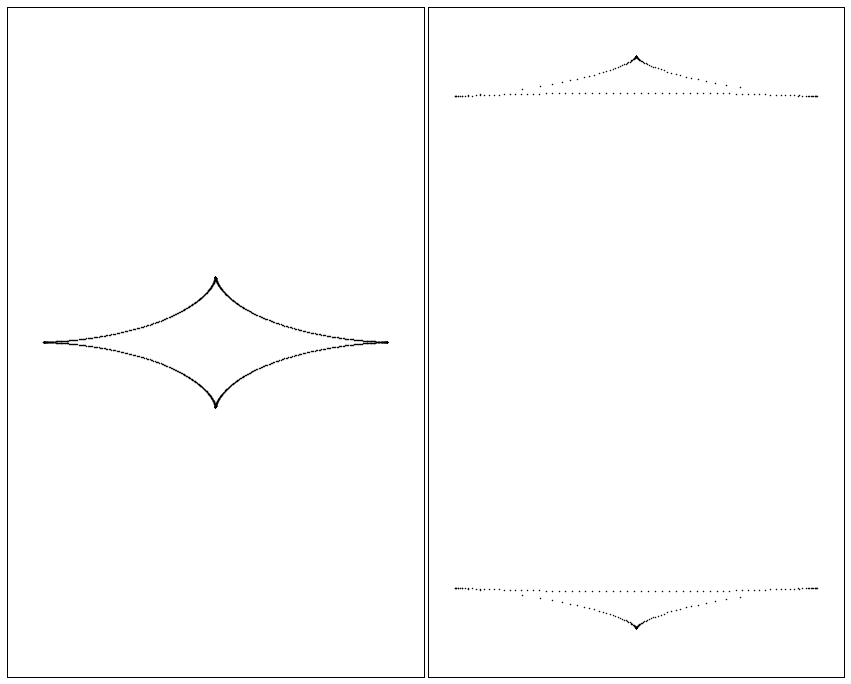

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12), sharey=True)
axs[0].plot(np.asarray(x_major)*3, 0.5 * np.asarray(y_major), 'k.', markersize = 2)
axs[1].plot(x_minor, y_minor, 'k.', markersize = 2)


axs[0].tick_params(axis='both',which='both', bottom='off', top='off',left = 'off', right = 'off', labelbottom='off', labelleft='off')
axs[1].tick_params(axis='both',which='both', bottom='off', top='off',left = 'off', right = 'off', labelbottom='off', labelleft='off')

plt.subplots_adjust(left=None, bottom=None,  right=None, top=None, wspace=0.01, hspace=None)


# plt.ylim(-0.15,0.15)
# axs[0].set_xlim(-1 * s_major - 0.1,0.5)
# axs[1].set_xlim(-1 * s_minor - 0.1,0.2)

# fig.savefig('Planetary_Caustics.png')

In [32]:
s

NameError: name 's' is not defined